In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf

In [2]:
# load data
work_dir = 'working_cats/images/'

x_train = np.load(work_dir+'x_train.npy')
print('loaded x_train.npy')
x_test = np.load(work_dir+'x_test.npy')
print('loaded x_test.npy')
x_val = np.load(work_dir+'x_test.npy')
print('loaded x_val.npy')

y_train = np.load(work_dir+'y_train.npy')
print('loaded y_train.npy')
y_test = np.load(work_dir+'y_test.npy')
print('loaded y_test.npy')
y_val = np.load(work_dir+'y_test.npy')
print('loaded y_val.npy')

loaded x_train.npy
loaded x_test.npy
loaded x_val.npy
loaded y_train.npy
loaded y_test.npy
loaded y_val.npy


In [3]:
import pandas as pd

# read in df
fn = 'working_cats/data/breeds_data_final.pkl'
breeds = pd.read_pickle(fn)
br = pd.unique(breeds['breed'])
num_breeds = len(br)

(32, 32, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64

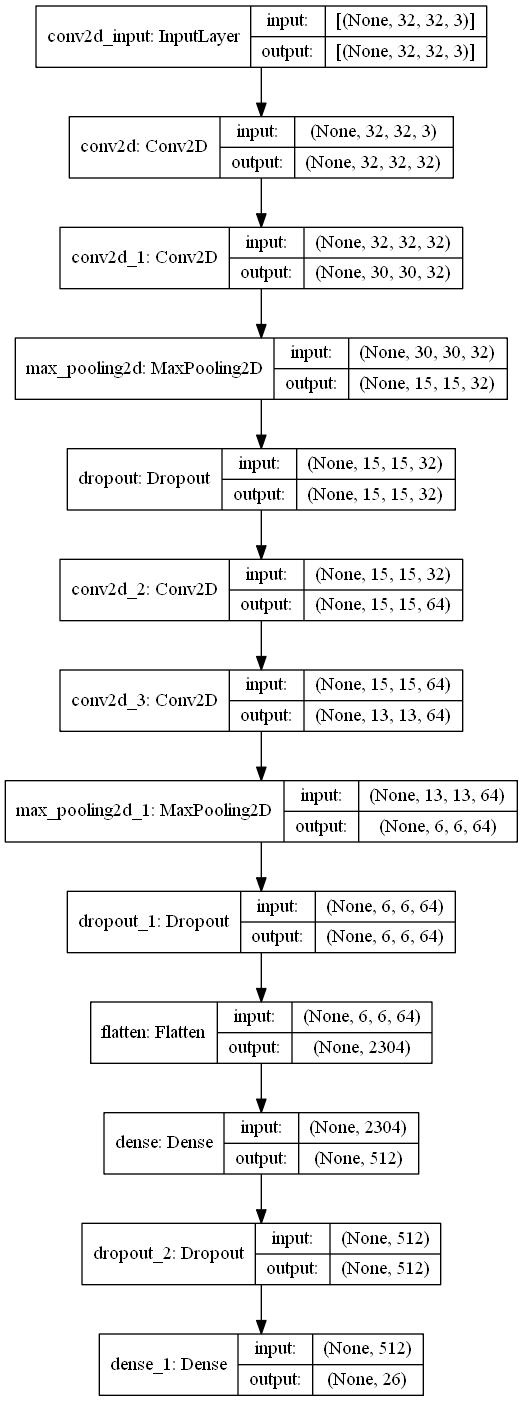

In [4]:
import os

#build model

print(x_train.shape[1:])
ar_size = 32

model = Sequential([
    Conv2D(ar_size, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    Conv2D(ar_size, 3, activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(ar_size * 2, 3, padding='same', activation='relu'),
    Conv2D(ar_size * 2, 3, activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_breeds, activation='softmax'),
])

model.summary()

model_path = 'basic_CNN_model/model.png'
if not os.path.exists(model_path.rsplit('/',1)[0]):
    os.makedirs(model_path.rsplit('/',1)[0])
        
plot_model(model,to_file=model_path,show_shapes=True)

In [5]:
# train
batch_size = 20
epochs = 30

model.compile(optimizer=RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=batch_size,
                    validation_data=(x_test,y_test),
                    epochs=epochs)

Epoch 1/30
 873/1134 [======================>.......] - ETA: 3s - loss: 27794.2770 - acc: 0.0443

KeyboardInterrupt: 

In [ ]:
import pickle 

with open('basic_CNN_model/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [ ]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=br, yticklabels=br)
plt.savefig('basic_CNN_model/Basic_CNN_heatmap.png')